# **FEC ASSIGNMENT #2**


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt


In [1]:
stocks = ['AMZN','CIPLA.NS','HDB','IOC.NS','TTM']

In [ ]:
data = web.DataReader(stocks,data_source='yahoo',start='01/04/2015',end='31/03/2017')['Adj Close']

data.sort_index(inplace=True)

In [ ]:
returns = data.pct_change()


In [ ]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()


NameError: ignored

In [ ]:
cov_matrix


Symbols,AMZN,CIPLA.NS,HDB,IOC.NS,TTM
Symbols,,,,,
AMZN,0.000356,0.000016,0.000048,0.000018,0.000120
CIPLA.NS,0.000016,0.000257,0.000057,0.000088,0.000064
HDB,0.000048,0.000057,0.000202,0.000042,0.000168
IOC.NS,0.000018,0.000088,0.000042,0.000351,0.000079
TTM,0.000120,0.000064,0.000168,0.000079,0.000521


In [ ]:
num_portfolios = 25000

In [ ]:
results = np.zeros((4+len(stocks)-1,num_portfolios))


In [ ]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.dot(mean_daily_returns ,weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [ ]:

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])


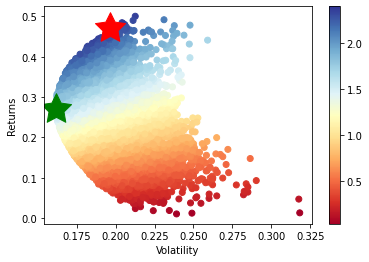

In [ ]:

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [ ]:
print(max_sharpe_port)

ret         0.471222
stdev       0.196616
sharpe      2.396664
AMZN        0.445354
CIPLA.NS    0.023977
HDB         0.106700
IOC.NS      0.421228
TTM         0.002742
Name: 10561, dtype: float64


In [ ]:
print(min_vol_port)

ret         0.269639
stdev       0.161782
sharpe      1.666679
AMZN        0.228973
CIPLA.NS    0.249969
HDB         0.348779
IOC.NS      0.156720
TTM         0.015559
Name: 2938, dtype: float64



**Q & A:-**


*   **How did you choose the stocks?**<br>
I choosed the stocks from **different major sectors** that are mostly in **gain**. 

*  **What is the impact of increasing the number of stocks in the portfolio?**
<br>By investing in more than one stock, an investor can reap the benefits of diversification, particularly a reduction in the riskiness of the portfolio.

*   **Why are calculating the weights by optimization and not giving equal weightage to every stock?**
<br>In order to gain **MAXIMUM RETURNS** and **MINIMUM VOLATILITY** , by taking risks rather than a portfolio with equal weights that involves inimal risks.
* **Which optimization techniques are used by Mutual Funds currently?**
<br>They use techniques in which future risks of mutual funds are represented by **triangular fuzzy numbers**. Firstly, a cluster analysis is proposed to categorize the huge amount of equity mutual funds into several groups based on four evaluation indices: **rates of return, standard deviation, turnover rate, and Treynor index**, in order to aid investors in making the investment decision. **The fuzzy optimization model** is proposed to determine the optimal investment proportion of each cluster. The portfolio optimization problem is developed in two ways: to maximize the future expected return subject to the given greatest future risk, and to minimize the future risk subject to a required lowest future expected return.






